# Inspection

For the most part, this notebook will just be a tidied up version of the raspberry pi performance notebook. The main objective I have in mind here is to take all of the investigation I did in the mentioned notebook and then creating more visually clean graphs and try to convey the information across effectively.

## Imports

Here I am importing everything that will be used throughout the notebook. If I am importing something that will only be used in a specific place, I will import the library there rather than here.

In [1]:
import os.path

%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

First, I begin by defining a function that takes care of the zip files and folder paths.

The output of the function should be a list of all of the individual tests.

In [2]:
def file_checking(folder, zipFile):
    """
    This function takes in a folder path and a zipfile.
    If the folder exists, it does nothing with the zipfile
    it will then return a list of the files within
    
    Otherwise, it will unzip the zipfile and return a list
    of the files within the zipfile
    """
    files = []
    if (os.path.isdir(folder)): # Check that the directory exists
        files = os.listdir(folder)
        
    elif (os.path.isfile(zipFile)): # If directory doesn't exist, check that a zipfile exists
        import zipfile
        with zipfile.ZipFile(zipFile, 'r') as zip_ref:
            zip_ref.extractall(folder)

        files = os.listdir(folder)
        
    else:
        print("Folder does not exist, nor does zipfile")
    
    for i in range(len(files)):
        files[i] = folder + '/' + files[i]
    
    files.sort()
    
    return files

Here I just execute the function on the Program test and the Docker test. I'm not too interested in the idle test anymore as it was just to see that everything was mostly working.

In [3]:
dockerPath = '../Input/Docker'
dockerZip = '../Input/Docker.zip'

docker = file_checking(dockerPath, dockerZip)
print(docker)

programPath = '../Input/Program'
programZip = '../Input/Program.zip'
program = file_checking(programPath, programZip)
print(program)

['../Input/Docker/docker.txt', '../Input/Docker/docker2.txt', '../Input/Docker/docker3.txt', '../Input/Docker/docker4.txt', '../Input/Docker/docker5.txt', '../Input/Docker/docker6.txt']
['../Input/Program/Prog1.txt', '../Input/Program/Prog2.txt', '../Input/Program/Prog3.txt', '../Input/Program/prog4.txt', '../Input/Program/prog5.txt', '../Input/Program/prog6.txt', '../Input/Program/prog7.txt', '../Input/Program/prog8.txt']


Now, I want to check that a results folder exists.

This seems to cause issues on Windows in my experience so it may just be easier to manually create the folders manually

In [4]:
dockerResults = '../Results/Docker'

if not os.path.exists(dockerResults): # There is a race condition here.
    os.makedirs(dockerResults)        # Make sure you don't create a folder while running this

else:
    pass

textResults = '../Results/Text'

if not os.path.exists(textResults): # There is a race condition here.
    os.makedirs(textResults)        # Make sure you don't create a folder while running this

else:
    pass

Now, I will want to start actually parsing the data that the Docker tests have given me.

After this cell, files that are defined in the two lists below should be filled with a cleaned up version of the top performance data.

In [5]:
import sys
sys.path.insert(1, r'./../Python')
from helper import *

resultPath = ['../Results/Docker/result1.txt', '../Results/Docker/result2.txt',
             '../Results/Docker/result3.txt', '../Results/Docker/result4.txt',
             '../Results/Docker/result5.txt', '../Results/Docker/result6.txt',]

resultPath2 = ['../Results/Text/result1.txt', '../Results/Text/result2.txt',
              '../Results/Text/result3.txt', '../Results/Text/result4.txt',
              '../Results/Text/result5.txt', '../Results/Text/result6.txt',
              '../Results/Text/result7.txt', '../Results/Text/result8.txt']


avoid = ["top", "Tasks", "%Cpu(s)", "KiB Mem", "KiB Swap"]

for i in range(len(resultPath)):
    parseTop(docker[i], resultPath[i], avoid)
    
for i in range(len(resultPath2)):
    parseTop(program[i], resultPath2[i], avoid)

In [6]:
"""
This is a bit of a nicer way of writing all of the 
cpu and mems and this should also work no matter how
many tests in a list

Not implemented yet

CPU, MEM = [], []

for path in resultPath:
    tempCPU, tempMEM = readFile(path)
    CPU.append(tempCPU)
    MEM.append(tempMEM)
"""

dCPU1, dMEM1 = readFile(resultPath[0])
dCPU2, dMEM2 = readFile(resultPath[1])
dCPU3, dMEM3 = readFile(resultPath[2])
dCPU4, dMEM4 = readFile(resultPath[3])
dCPU5, dMEM5 = readFile(resultPath[4])
dCPU6, dMEM6 = readFile(resultPath[5])

pCPU1, pMEM1 = readFile(resultPath2[0])
pCPU2, pMEM2 = readFile(resultPath2[1])
pCPU3, pMEM3 = readFile(resultPath2[2])
pCPU4, pMEM4 = readFile(resultPath2[3])
pCPU5, pMEM5 = readFile(resultPath2[4])
pCPU6, pMEM6 = readFile(resultPath2[5])
pCPU7, pMEM7 = readFile(resultPath2[6])
pCPU8, pMEM8 = readFile(resultPath2[7])

In [7]:
if CPU[0]['13058'] == dCPU1['13058']:
    print('equal')

equal


PID for main are:

test1 = 13058

test2 = 942

test3 = 947

test4 = 945

test5 = 962

test 6 = 929

Now, I've stored all of the mains into a numpy array for convenience.

In [8]:
mains = ['13058', '942', '947', '945', '962', '929']

main1 = np.array(dCPU1[mains[0]])
main2 = np.array(dCPU2[mains[1]])
main3 = np.array(dCPU3[mains[2]])
main4 = np.array(dCPU4[mains[3]])
main5 = np.array(dCPU5[mains[4]])
main6 = np.array(dCPU6[mains[5]])

'''
main = ['1486', '2303', '3217', '4183', '4870', '6012', '6617', '7494']

prog1 = np.array(pCPU1[main[0]])
prog2 = np.array(pCPU2[main[1]])
prog3 = np.array(pCPU3[main[2]])
prog4 = np.array(pCPU4[main[3]])
prog5 = np.array(pCPU5[main[4]])
prog6 = np.array(pCPU6[main[5]])
prog7 = np.array(pCPU7[main[6]])
prog8 = np.array(pCPU8[main[7]])
'''

"\nmain = ['1486', '2303', '3217', '4183', '4870', '6012', '6617', '7494']\n\nprog1 = np.array(pCPU1[main[0]])\nprog2 = np.array(pCPU2[main[1]])\nprog3 = np.array(pCPU3[main[2]])\nprog4 = np.array(pCPU4[main[3]])\nprog5 = np.array(pCPU5[main[4]])\nprog6 = np.array(pCPU6[main[5]])\nprog7 = np.array(pCPU7[main[6]])\nprog8 = np.array(pCPU8[main[7]])\n"

Now, I want to create a graph that conveys the information I want. I want to create a graph that shows the mean value of the signals as well as the standard deviation at the same time. To begin with, I start by calculating the standard deviation and the mean for every point in time.

In [9]:
mean = []
std = []

for i in range(100):
    value = np.array([main1[i], main2[i], main3[i], main4[i], main5[i], main6[i]])
    mean.append(np.mean(value))
    std.append(np.std(value))
    
mean = np.array(mean)
std = np.array(std)
'''
meanP = []
stdP = []

for i in range(100):
    value = np.array([prog1[i], prog2[i], prog3[i], prog4[i], prog5[i], prog6[i], prog7[i], prog8[i]])
    meanP.append(np.mean(value))
    stdP.append(np.std(value))
    
meanP = np.array(meanP)
stdP = np.array(stdP)
'''

'\nmeanP = []\nstdP = []\n\nfor i in range(100):\n    value = np.array([prog1[i], prog2[i], prog3[i], prog4[i], prog5[i], prog6[i], prog7[i], prog8[i]])\n    meanP.append(np.mean(value))\n    stdP.append(np.std(value))\n    \nmeanP = np.array(meanP)\nstdP = np.array(stdP)\n'

Now, I graph

## Docker

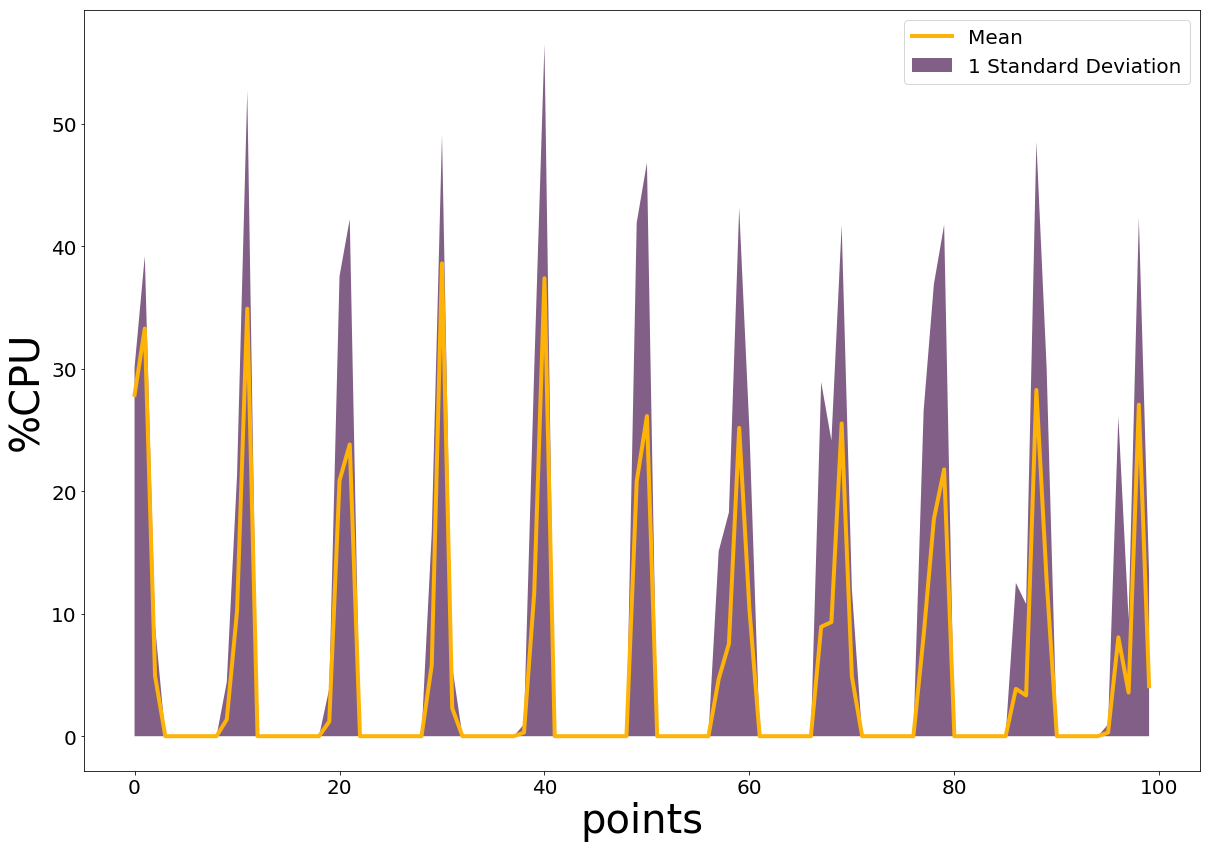

In [10]:
C = ["#7bb274", "#a8a495", "#feb308", "#3778bf", "#825f87", '#d9544d', '#ffff7e', '#3b5b92']

fig = plt.figure(figsize = (20, 14))
ax = fig.add_subplot(111, label = "Comparison")

points = np.arange(0, len(mean))

ax.plot(points, mean, color = C[2], label = 'Mean',    linewidth = 4)
ax.fill_between(points, mean + std, facecolor = C[4], label = "1 Standard Deviation")
ax.set_ylabel('%CPU', fontsize = 40)
ax.set_xlabel('points', fontsize = 40)

ax.legend(prop = {'size': 20})

ax.tick_params(axis = 'both', which = 'major', labelsize = 20)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 20)

plt.show()

## Without Docker

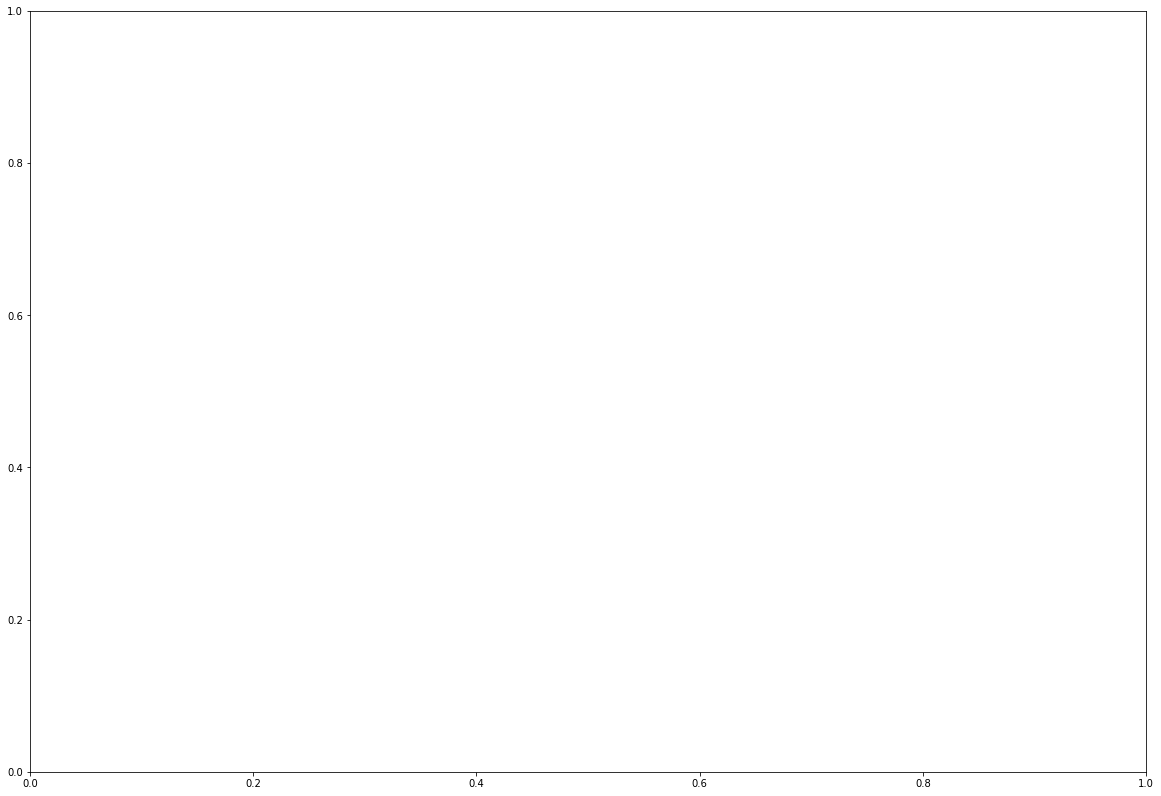

In [11]:
try:
    fig = plt.figure(figsize = (20, 14))
    ax = fig.add_subplot(111, label = "Comparison")

    points = np.arange(0, len(meanP))

    ax.plot(points, meanP, color = C[2], label = 'Mean',    linewidth = 4)
    ax.fill_between(points, meanP + stdP, facecolor = C[4], label = "1 Standard Deviation")
    ax.set_ylabel('%CPU', fontsize = 40)
    ax.set_xlabel('points', fontsize = 40)

    ax.legend(prop = {'size': 20})

    ax.tick_params(axis = 'both', which = 'major', labelsize = 20)
    ax.tick_params(axis = 'both', which = 'minor', labelsize = 20)

    plt.show()
except:
    pass

# Box Plots

To graph a box plot, I need the minimum, maximum, median and quartiles.

## Docker

In [12]:
# I do a list comprehension here to remove all 0s
# The reason I do this is because the median, 1st quartile
# and 4th quartile are all 0 if I don't
# The information I get with the 0s in is not useful
m1 = [x for x in main1 if x > 0]
m2 = [x for x in main2 if x > 0]
m3 = [x for x in main3 if x > 0]
m4 = [x for x in main4 if x > 0]
m5 = [x for x in main5 if x > 0]
m6 = [x for x in main6 if x > 0]

median1 = np.median(m1)
median2 = np.median(m2)
median3 = np.median(m3)
median4 = np.median(m4)
median5 = np.median(m5)
median6 = np.median(m6)
median = [median1, median2, median3, median4, median5, median6]

max1 = max(m1)
max2 = max(m2)
max3 = max(m3)
max4 = max(m4)
max5 = max(m5)
max6 = max(m6)
ma = [max1, max2, max3, max4, max5, max6]

min1 = min(m1)
min2 = min(m2)
min3 = min(m3)
min4 = min(m4)
min5 = min(m5)
min6 = min(m6)
mi = [min1, min2, min3, min4, min5, min6]

q11 = np.percentile(m1, 25)
q12 = np.percentile(m2, 25)
q13 = np.percentile(m3, 25)
q14 = np.percentile(m4, 25)
q15 = np.percentile(m5, 25)
q16 = np.percentile(m6, 25)
q1 = [q11, q12, q13, q14, q15, q16]

q31 = np.percentile(m1, 75)
q32 = np.percentile(m2, 75)
q33 = np.percentile(m3, 75)
q34 = np.percentile(m4, 75)
q35 = np.percentile(m5, 75)
q36 = np.percentile(m6, 75)
q3 = [q31, q32, q33, q34, q35, q36]

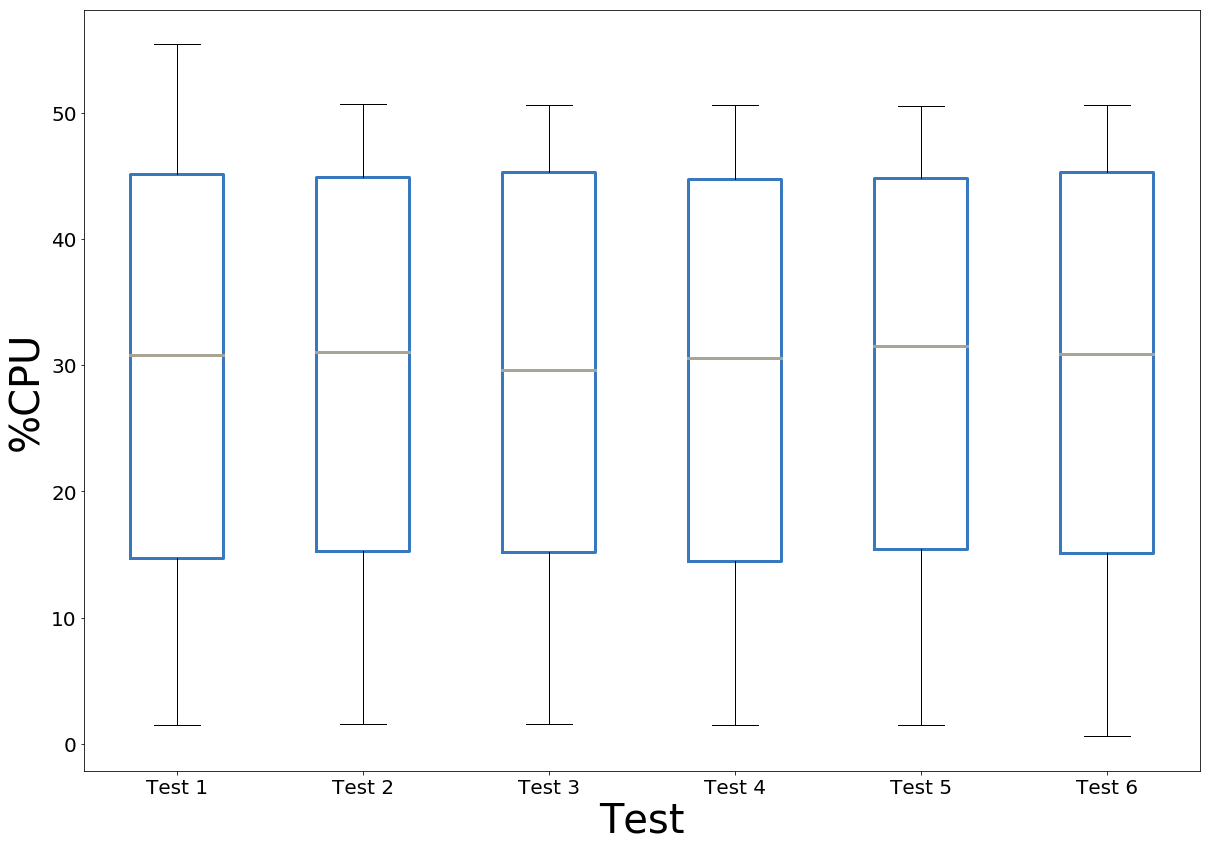

In [13]:
import matplotlib.cbook as cbook

data = [main1, main2, main3, main4, main5, main6]
labels = ['Test 1', 'Test 2', 'Test 3', 'Test 4', 'Test 5', 'Test 6']

stats1 = cbook.boxplot_stats(data, labels = labels)

for n in range(len(stats1)):
    stats1[n]['med'] = median[n]
    stats1[n]['q1'] = q1[n]
    stats1[n]['q3'] = q3[n]
    stats1[n]['whislo'] = mi[n]
    stats1[n]['whishi'] = ma[n]

boxprops = dict(linewidth = 3, color = C[3])    
medianprops = dict(linewidth = 3, color = C[1])

fig, axes = plt.subplots(figsize=(20, 14))
bplot1 = axes.bxp(stats1, showfliers = False, boxprops = boxprops, medianprops = medianprops)

axes.set_ylabel('%CPU', fontsize = 40)
axes.set_xlabel('Test', fontsize = 40)

axes.tick_params(axis = 'both', which = 'major', labelsize = 20)
axes.tick_params(axis = 'both', which = 'minor', labelsize = 20)

plt.show()

## Without Docker

In [14]:
try:
    # I do a list comprehension here to remove all 0s
    # The reason I do this is because the median, 1st quartile
    # and 4th quartile are all 0 if I don't
    # The information I get with the 0s in is not useful
    m1 = [x for x in prog1 if x > 0]
    m2 = [x for x in prog2 if x > 0]
    m3 = [x for x in prog3 if x > 0]
    m4 = [x for x in prog4 if x > 0]
    m5 = [x for x in prog5 if x > 0]
    m6 = [x for x in prog6 if x > 0]
    m7 = [x for x in prog7 if x > 0]
    m8 = [x for x in prog8 if x > 0]

    median1 = np.median(m1)
    median2 = np.median(m2)
    median3 = np.median(m3)
    median4 = np.median(m4)
    median5 = np.median(m5)
    median6 = np.median(m6)
    median7 = np.median(m7)
    median8 = np.median(m8)

    median = [median1, median2, median3, median4, median5, median6, median7, median8]

    max1 = max(m1)
    max2 = max(m2)
    max3 = max(m3)
    max4 = max(m4)
    max5 = max(m5)
    max6 = max(m6)
    max7 = max(m7)
    max8 = max(m8)
    ma = [max1, max2, max3, max4, max5, max6, max7, max8]

    min1 = min(m1)
    min2 = min(m2)
    min3 = min(m3)
    min4 = min(m4)
    min5 = min(m5)
    min6 = min(m6)
    min7 = min(m7)
    min8 = min(m8)
    mi = [min1, min2, min3, min4, min5, min6, min7, min8]

    q11 = np.percentile(m1, 25)
    q12 = np.percentile(m2, 25)
    q13 = np.percentile(m3, 25)
    q14 = np.percentile(m4, 25)
    q15 = np.percentile(m5, 25)
    q16 = np.percentile(m6, 25)
    q17 = np.percentile(m7, 25)
    q18 = np.percentile(m8, 25)
    q1 = [q11, q12, q13, q14, q15, q16, q17, q18]

    q31 = np.percentile(m1, 75)
    q32 = np.percentile(m2, 75)
    q33 = np.percentile(m3, 75)
    q34 = np.percentile(m4, 75)
    q35 = np.percentile(m5, 75)
    q36 = np.percentile(m6, 75)
    q37 = np.percentile(m7, 75)
    q38 = np.percentile(m8, 75)
    q3 = [q31, q32, q33, q34, q35, q36, q37, q38]
except:
    pass

In [15]:
try:
    data = [prog1, prog2, prog3, prog4, prog5, prog6, prog7, prog8]
    labels = ['Test 1', 'Test 2', 'Test 3', 'Test 4', 'Test 5', 'Test 6', 'Test 7', 'Test 8']

    stats1 = cbook.boxplot_stats(data, labels = labels)

    for n in range(len(stats1)):
        stats1[n]['med'] = median[n]
        stats1[n]['q1'] = q1[n]
        stats1[n]['q3'] = q3[n]
        stats1[n]['whislo'] = mi[n]
        stats1[n]['whishi'] = ma[n]

    boxprops = dict(linewidth = 3, color = C[3])    
    medianprops = dict(linewidth = 3, color = C[1])

    fig, axes = plt.subplots(figsize=(20, 14))
    bplot1 = axes.bxp(stats1, showfliers = False, boxprops = boxprops, medianprops = medianprops)

    axes.set_ylabel('%CPU', fontsize = 40)
    axes.set_xlabel('Test', fontsize = 40)

    axes.tick_params(axis = 'both', which = 'major', labelsize = 20)
    axes.tick_params(axis = 'both', which = 'minor', labelsize = 20)

    plt.show()
except:
    pass

In [16]:
import sys
sys.path.insert(1, r'./../Python')
from detect_peaks import detect_peaks

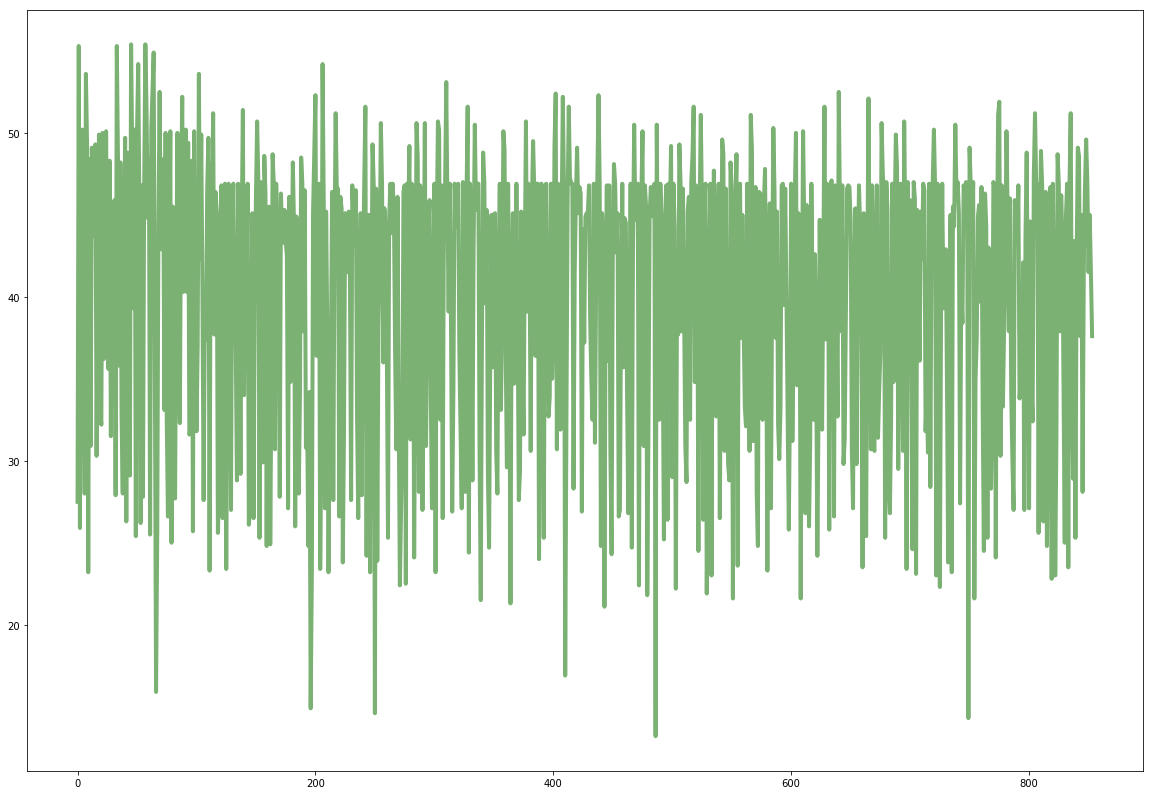

In [17]:
peaks1 = detect_peaks(main1)
peaks2 = detect_peaks(main2)
peaks3 = detect_peaks(main3)
peaks4 = detect_peaks(main4)
peaks5 = detect_peaks(main5)
peaks6 = detect_peaks(main6)

fig = plt.figure(figsize = (20, 14))
ax = fig.add_subplot(111, label = "Comparison")

ax.plot(main1[peaks1], color = C[0], label = 'Mean', linewidth = 4)
plt.show()

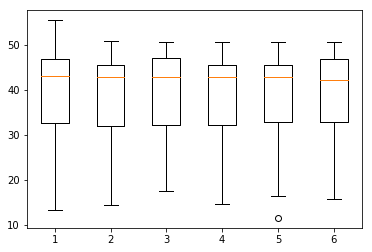

In [18]:
# data = [main1[peaks1], main2[peaks2], main3[peaks3], main4[peaks4], main5[peaks5], main6[peaks6]]

mains = [main1, main2, main3, main4, main5, main6]
peaks = [peaks1, peaks2, peaks3, peaks4, peaks5, peaks6]

data = [main[peak] for main, peak in zip(mains, peaks)]

plt.boxplot(data)
plt.show()

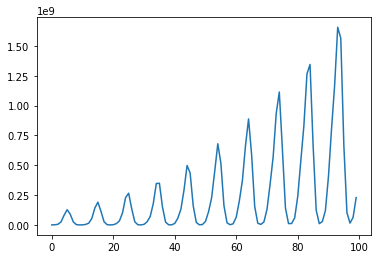

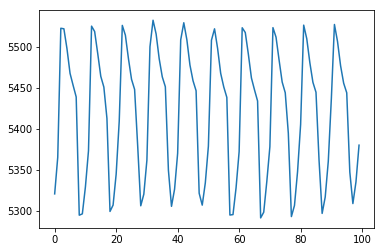

In [19]:
from scipy import signal

cross = signal.correlate(main1, main2)
cross = signal.correlate(cross, main3)
cross = signal.correlate(cross, main4)
cross = signal.correlate(cross, main5)
cross = signal.correlate(cross, main6)
cross = cross/ len(cross)


plt.plot(cross[100:200])
plt.show()


# Numpy is the same as scipy however it uses a different default.
# scipy defaults to mode = full while numpy defaults to valid
cross = np.correlate(main1, main2)
cross = cross/ len(cross)
cross = np.correlate(cross, main3)
cross = cross/ len(cross)
cross = np.correlate(cross, main4)
cross = cross/ len(cross)
cross = np.correlate(cross, main5)
cross = cross/ len(cross)
cross = np.correlate(cross, main6)
cross = cross/ len(cross)


plt.plot(cross[100:200])
plt.show()

# Program v2 in Docker

In [20]:
path = '../Input/DockerV2'
zipFile = '../Input/DockerV2.zip'
docker = []

if (os.path.isdir(path)): # Check that the directory exists
    docker = os.listdir(path)

elif (os.path.isfile(zipFile)): # If directory doesn't exist, check that a zipfile exists
    
    import zipfile
    with zipfile.ZipFile(zipFile, 'r') as zip_ref:
        zip_ref.extractall(path)
        
    docker = os.listdir(path)

else: # Neither zipfile or directory exists so error
    print('Look to see if Docker test results are in the input folder')
    
for i in range(len(docker)):
    docker[i] = path + '/' + docker[i]
    
docker.sort()
print(docker)

['../Input/DockerV2/docker1.txt', '../Input/DockerV2/docker10.txt', '../Input/DockerV2/docker2.txt', '../Input/DockerV2/docker3.txt', '../Input/DockerV2/docker4.txt', '../Input/DockerV2/docker5.txt', '../Input/DockerV2/docker6.txt', '../Input/DockerV2/docker7.txt', '../Input/DockerV2/docker8.txt', '../Input/DockerV2/docker9.txt']


Now, I create the results folder for the moment

In [21]:
dockerResults = '../Results/Docker'

if not os.path.exists(dockerResults): # There is a race condition here.
    os.makedirs(dockerResults)        # Make sure you don't create a folder while running this

else:
    pass

textResults = '../Results/Text'

if not os.path.exists(textResults): # There is a race condition here.
    os.makedirs(textResults)        # Make sure you don't create a folder while running this

else:
    pass

import sys
sys.path.insert(1, r'./../Python')
from helper import *

resultPath = ['../Results/DockerV2/result1.txt', '../Results/DockerV2/result10.txt',
             '../Results/DockerV2/result2.txt', '../Results/DockerV2/result3.txt',
             '../Results/DockerV2/result4.txt', '../Results/DockerV2/result5.txt',
             '../Results/DockerV2/result6.txt', '../Results/DockerV2/result7.txt',
             '../Results/DockerV2/result8.txt', '../Results/DockerV2/result9.txt',]

avoid = ["top", "Tasks", "%Cpu(s)", "KiB Mem", "KiB Swap"]

for i in range(len(resultPath)):
    parseTop(docker[i], resultPath[i], avoid)

Now, I go ahead and extract important values from all of these folders

In [22]:
dCPU1, dMEM1 = readFile(resultPath[0])
dCPU2, dMEM2 = readFile(resultPath[1])
dCPU3, dMEM3 = readFile(resultPath[2])
dCPU4, dMEM4 = readFile(resultPath[3])
dCPU5, dMEM5 = readFile(resultPath[4])
dCPU6, dMEM6 = readFile(resultPath[5])
dCPU7, dMEM7 = readFile(resultPath[6])
dCPU8, dMEM8 = readFile(resultPath[7])
dCPU9, dMEM9 = readFile(resultPath[8])
dCPU10, dMEM10 = readFile(resultPath[9])

mains = ['5264', '19505', '6711', '8410', '9736', '12640', '14394', '15832', '16790', '18092']

main1 = np.array(dCPU1[mains[0]])
main2 = np.array(dCPU2[mains[1]])
main3 = np.array(dCPU3[mains[2]])
main4 = np.array(dCPU4[mains[3]])
main5 = np.array(dCPU5[mains[4]])
main6 = np.array(dCPU6[mains[5]])
main7 = np.array(dCPU7[mains[6]])
main8 = np.array(dCPU8[mains[7]])
main9 = np.array(dCPU9[mains[8]])
main10 = np.array(dCPU10[mains[9]])

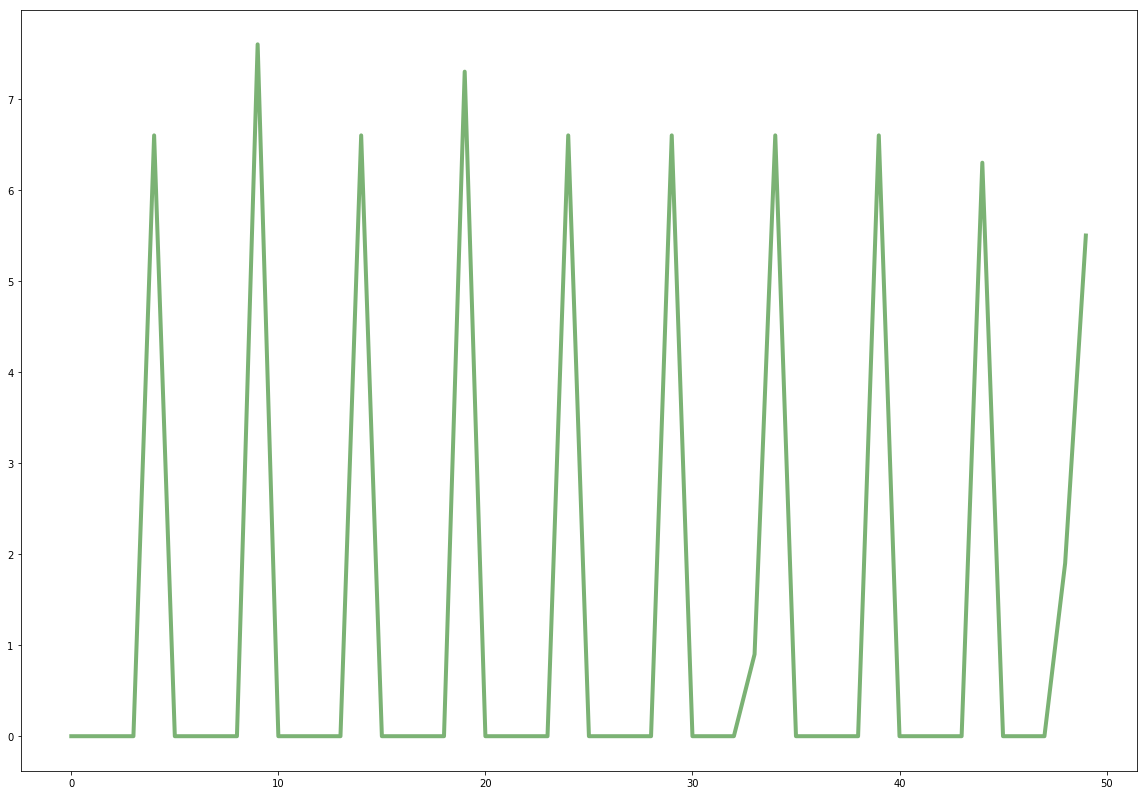

In [23]:
fig = plt.figure(figsize = (20, 14))
ax = fig.add_subplot(111, label = "Comparison")

ax.plot(main1[100:150], color = C[0], label = 'Mean', linewidth = 4)
plt.show()

Now, I want to extract only the peaks from all of the data I have.

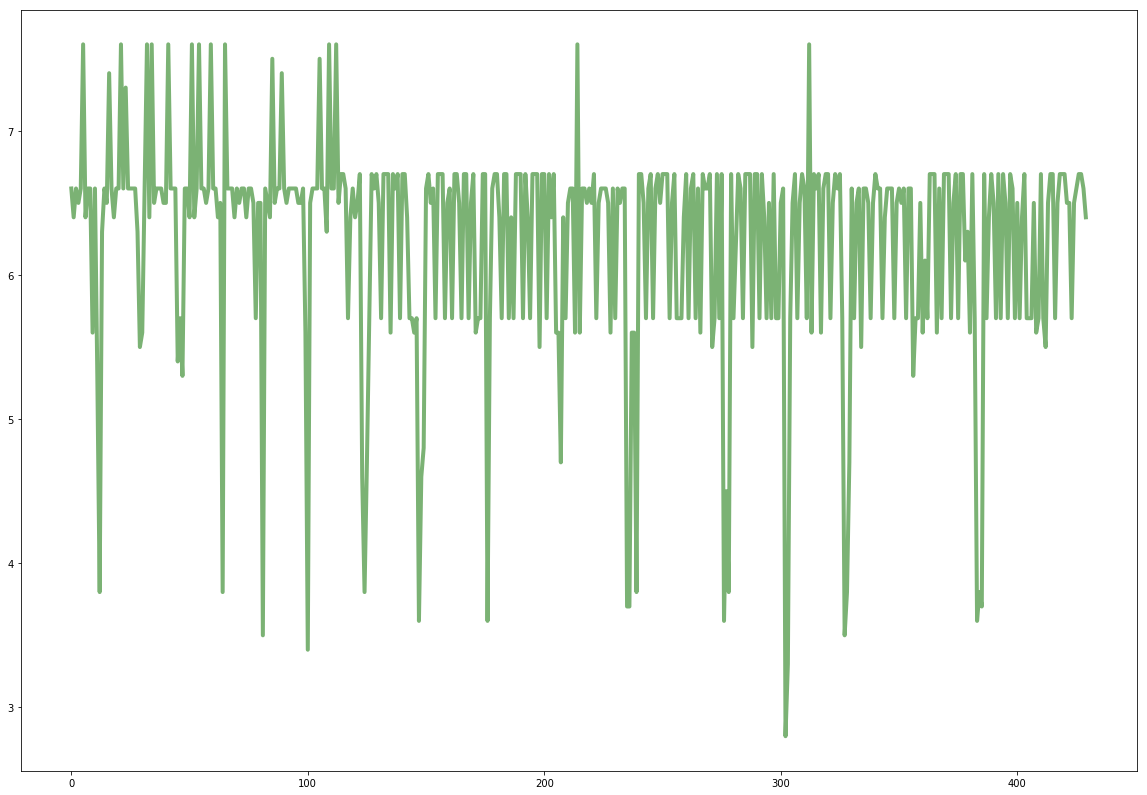

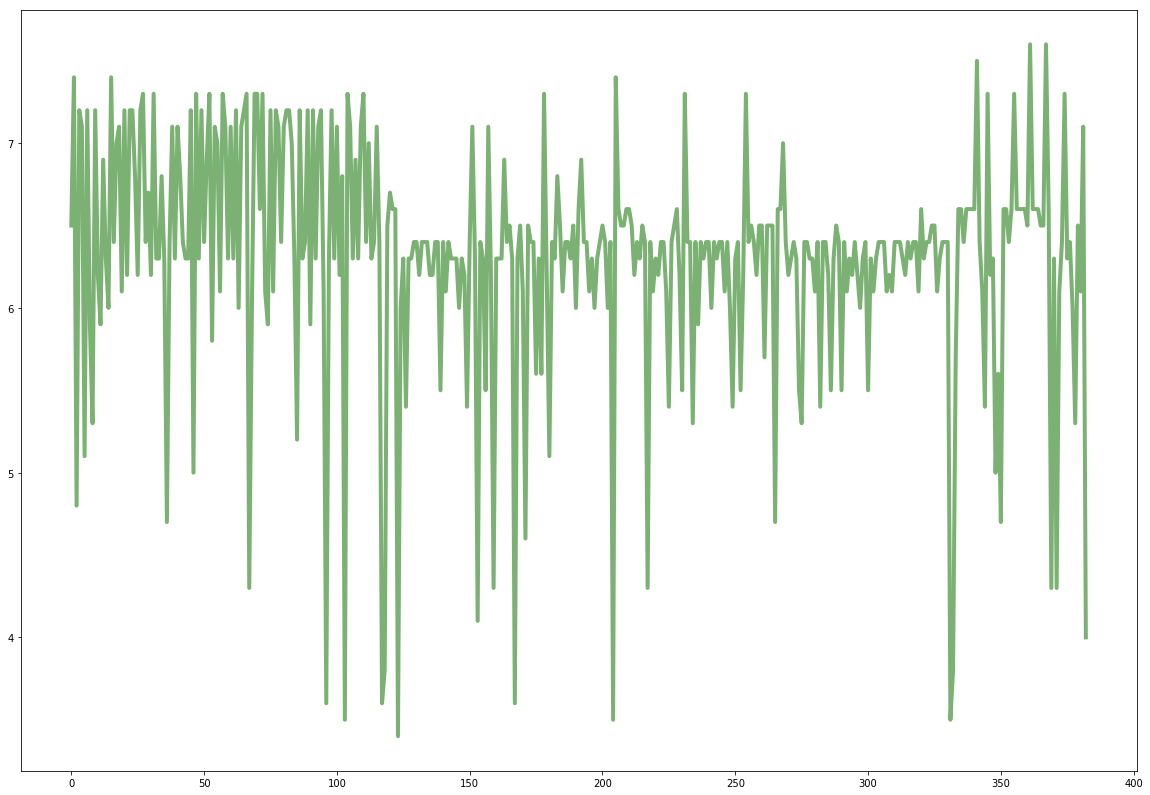

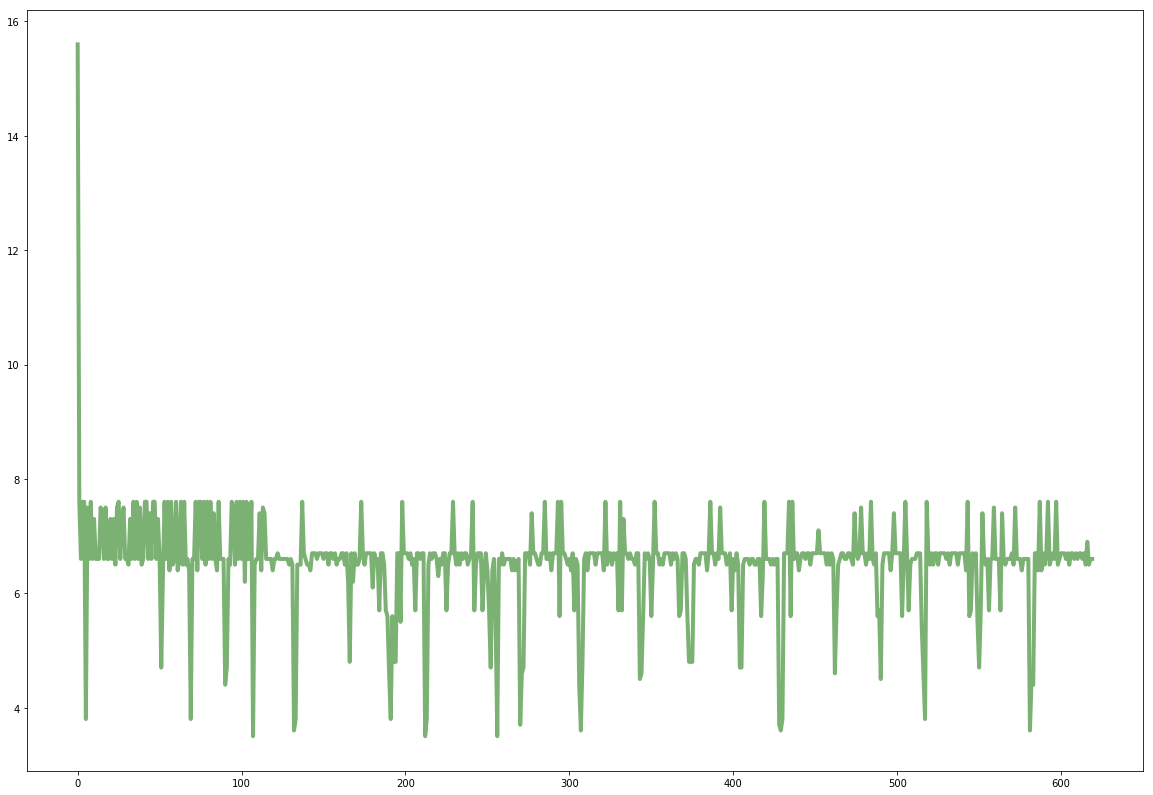

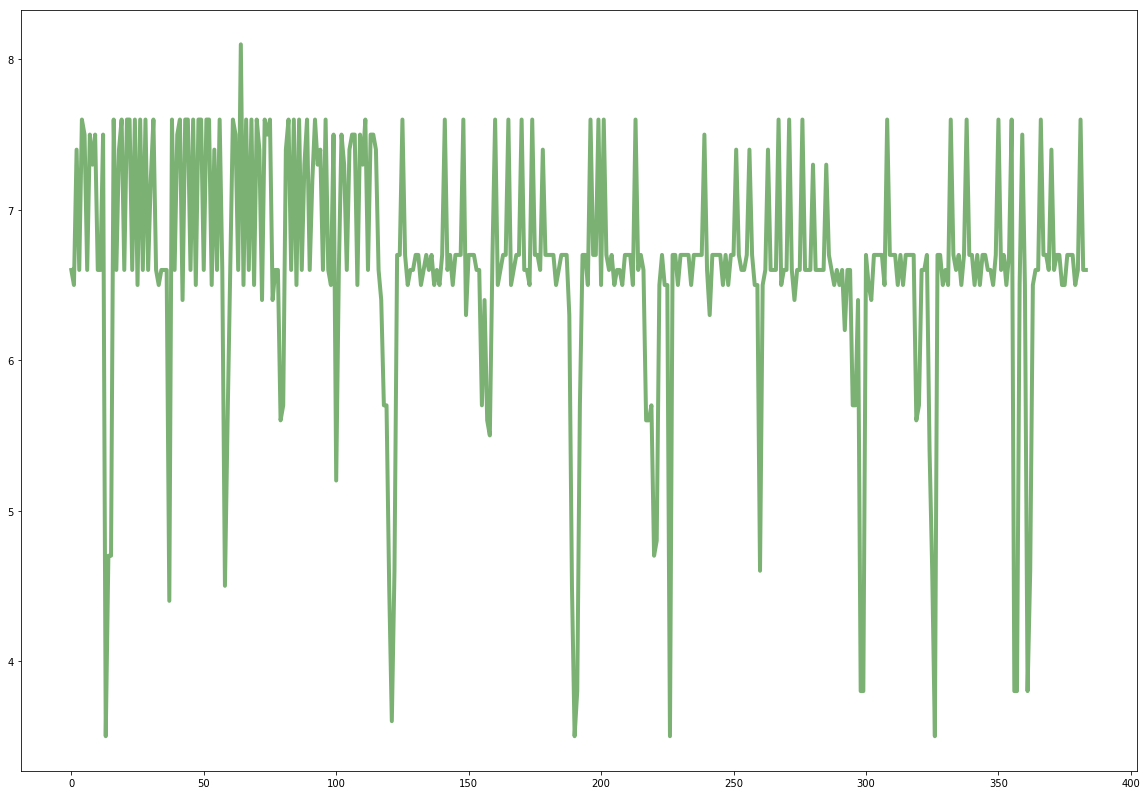

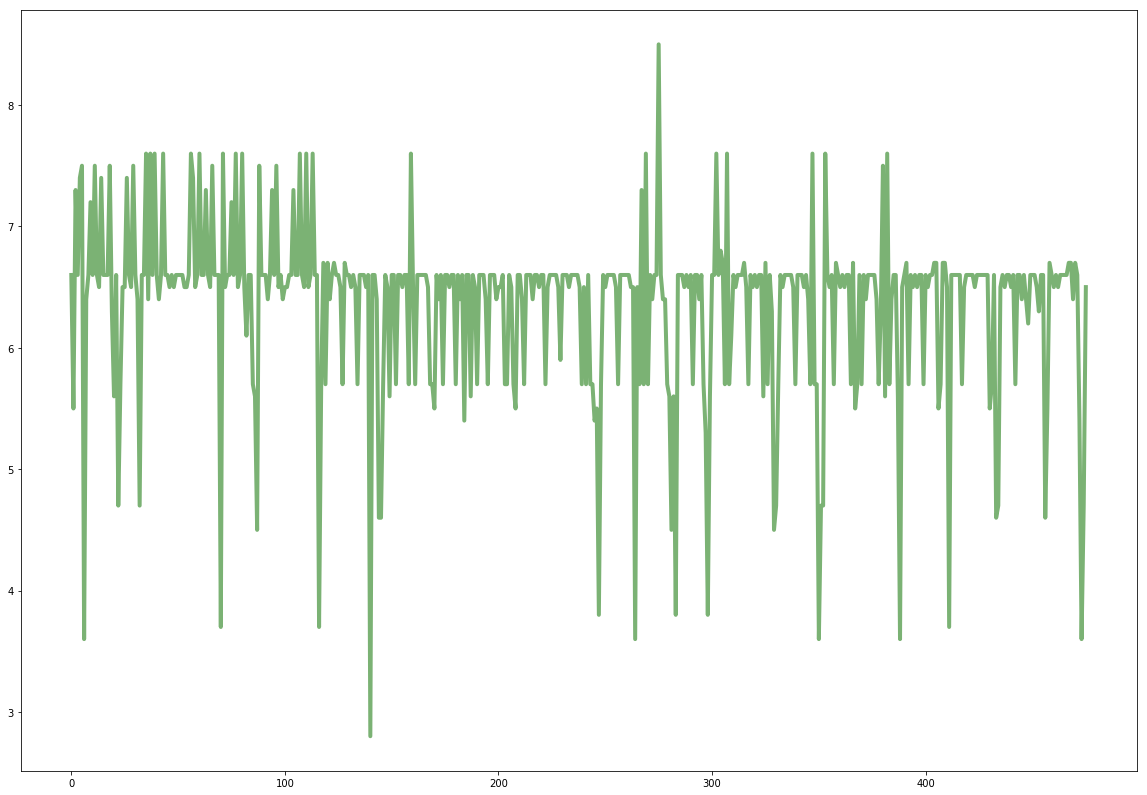

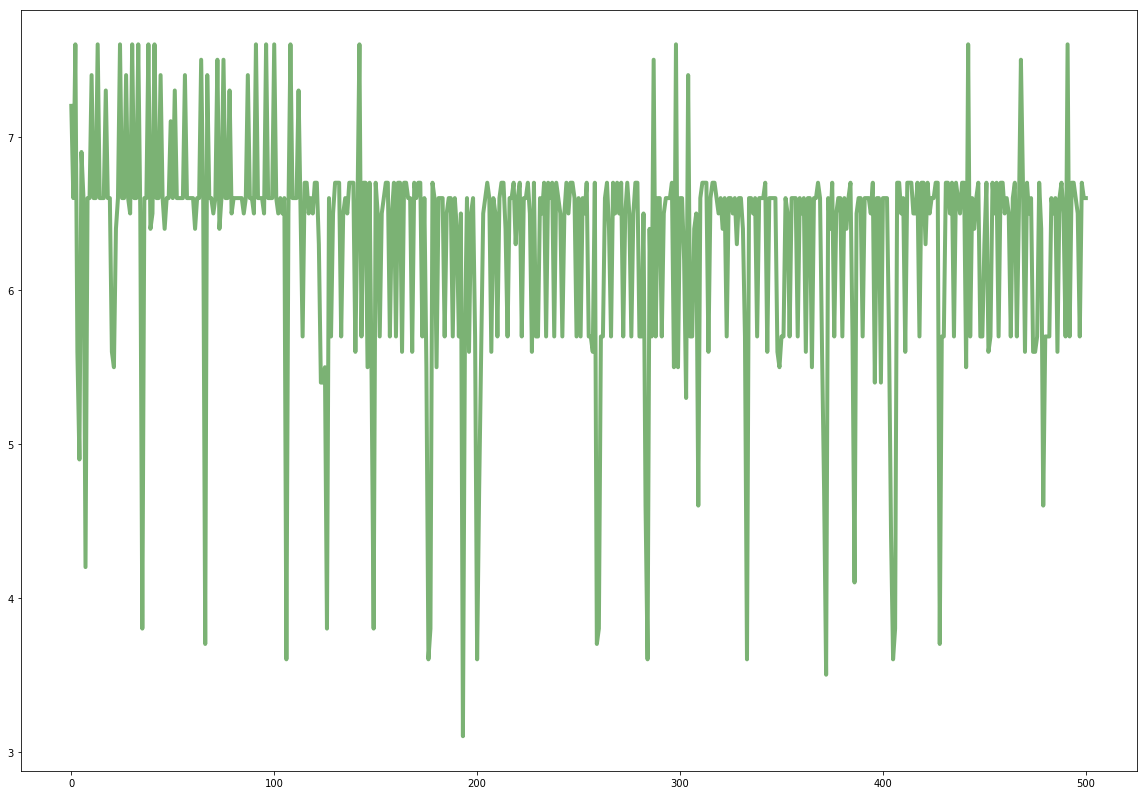

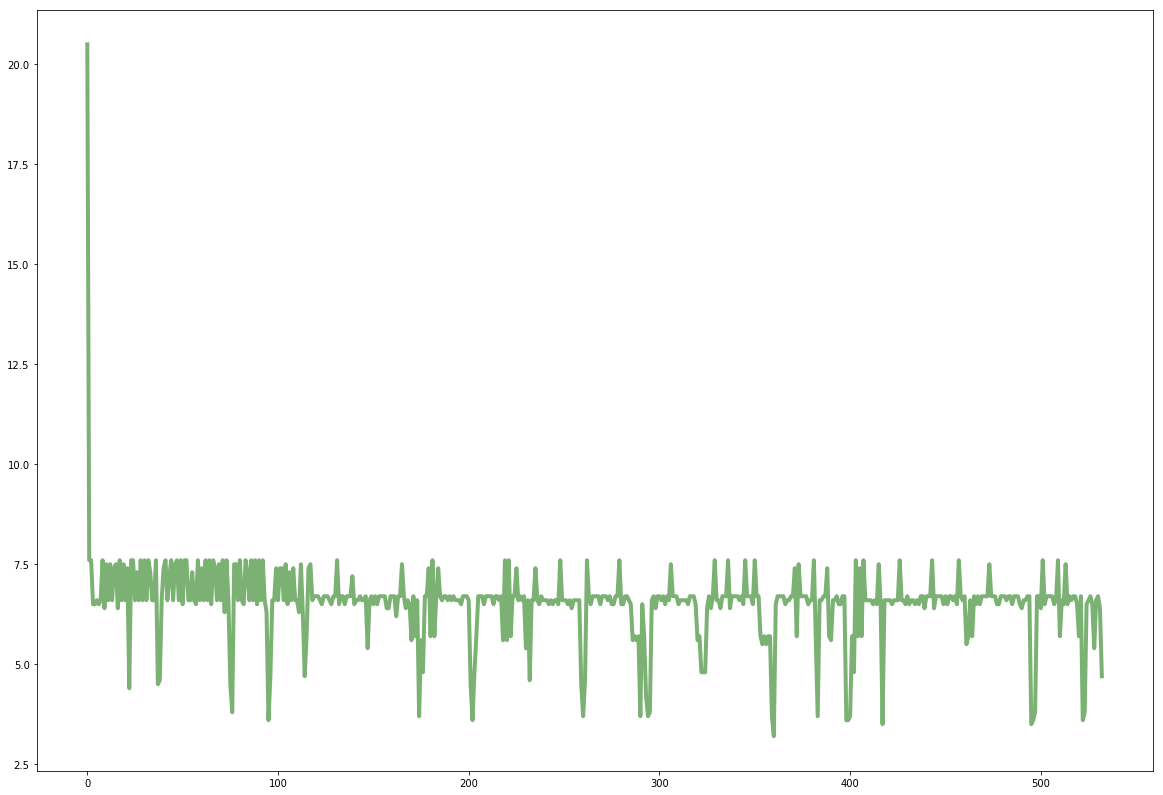

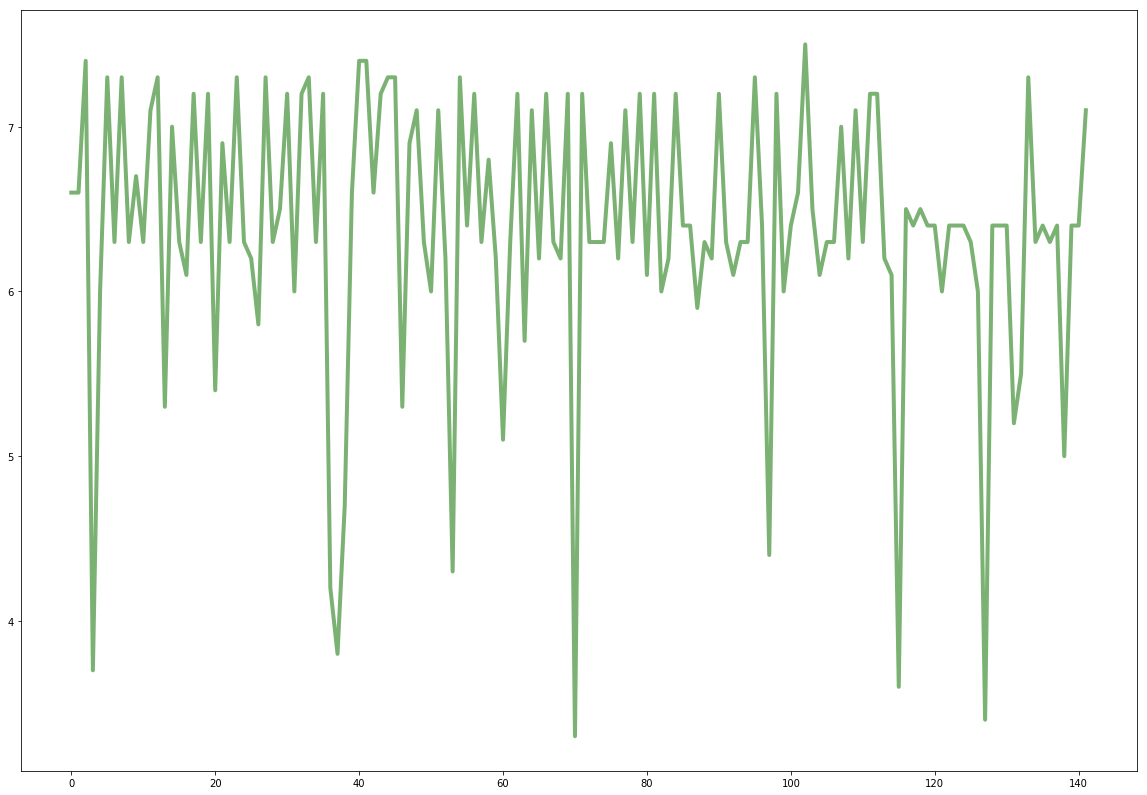

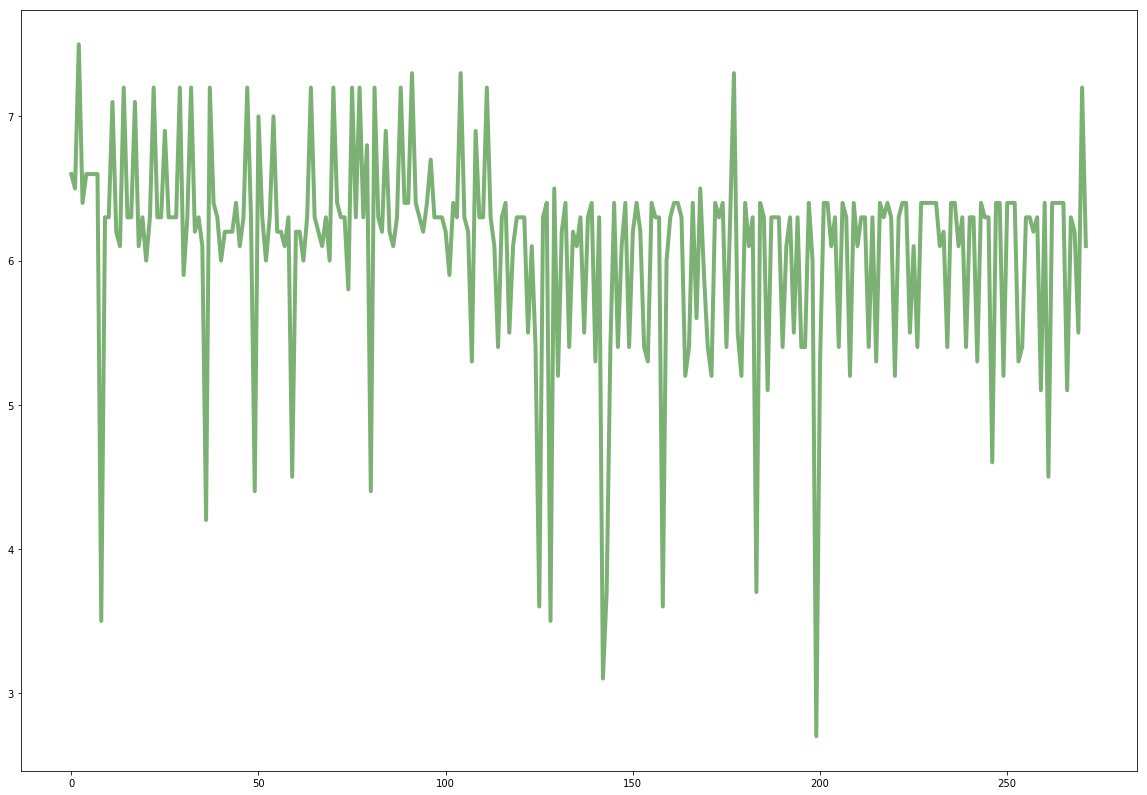

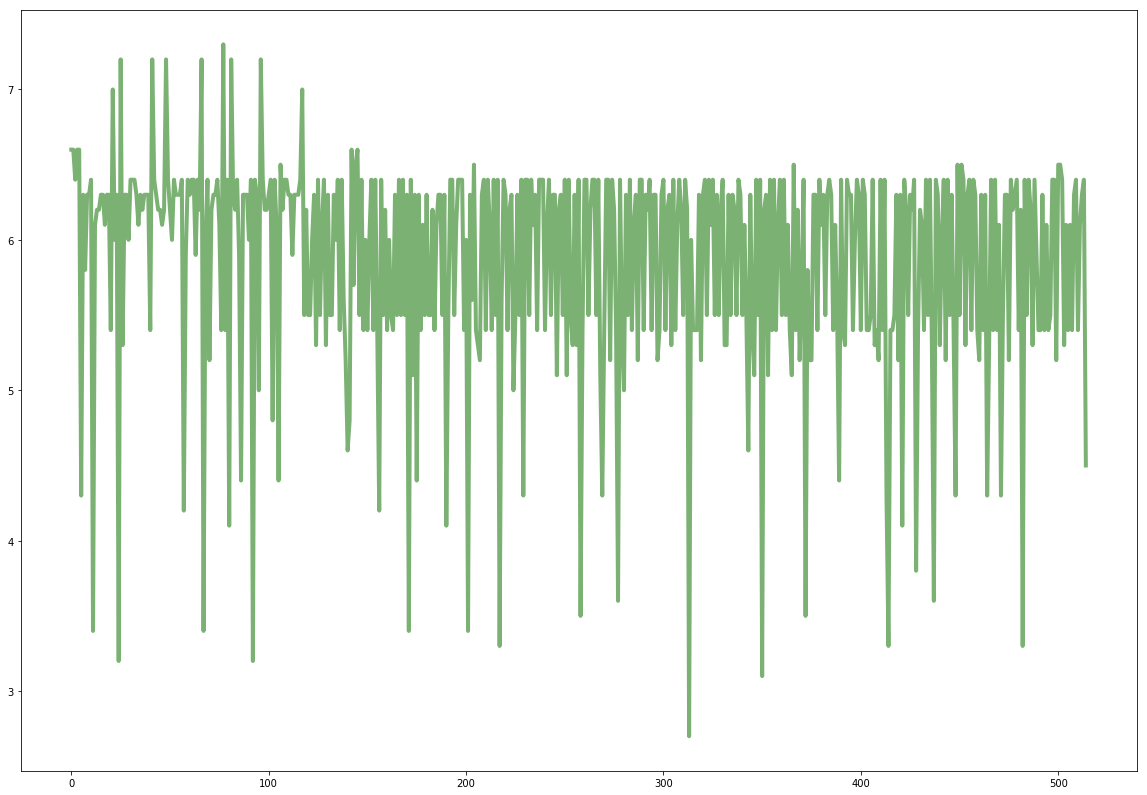

In [24]:
peaks1 = detect_peaks(main1)
peaks2 = detect_peaks(main2)
peaks3 = detect_peaks(main3)
peaks4 = detect_peaks(main4)
peaks5 = detect_peaks(main5)
peaks6 = detect_peaks(main6)
peaks7 = detect_peaks(main7)
peaks8 = detect_peaks(main8)
peaks9 = detect_peaks(main9)
peaks10 = detect_peaks(main10)

mains = [main1, main2, main3, main4, main5, main6, main7, main8, main9, main10]
peaks = [peaks1, peaks2, peaks3, peaks4, peaks5, peaks6, peaks7, peaks8, peaks9, peaks10]

for main, peak in zip(mains, peaks):
    fig = plt.figure(figsize = (20, 14))
    ax = fig.add_subplot(111, label = "Comparison")

    ax.plot(main[peak], color = C[0], label = 'Mean', linewidth = 4)
    plt.show()

The above data points are incredibly weird so I decided to rerun tests and see if this data is correct

# Debugging

In [25]:
path = '../Input/misc/dockerDebug1.txt'
results = '../Results/misc/debug1.txt'

parseTop(path, results, avoid)

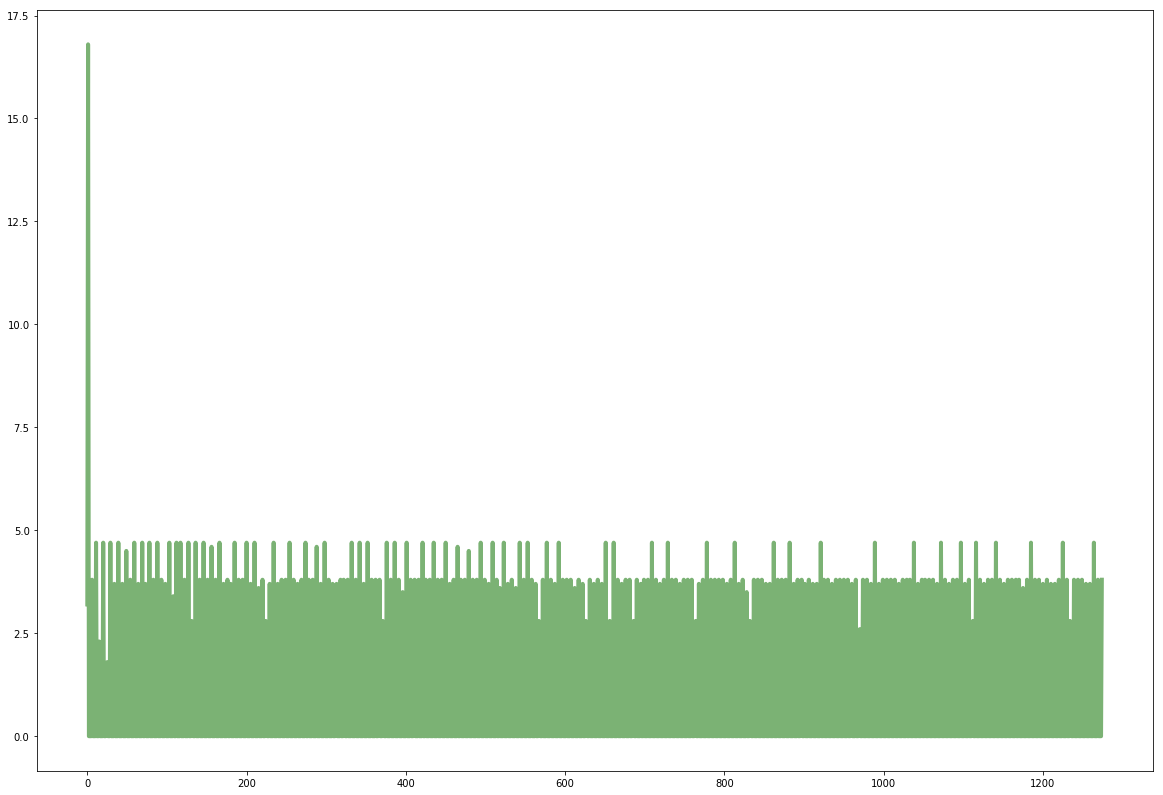

In [26]:
debugCPU1, debugMEM1 = readFile(results)

main = np.array(debugCPU1['945'])

fig = plt.figure(figsize = (20, 14))
ax = fig.add_subplot(111, label = "Comparison")

ax.plot(main, color = C[0], label = 'Mean', linewidth = 4)
plt.show()

In [27]:
path = '../Input/misc/dockerDebug2.txt'
results = '../Results/misc/debug2.txt'

parseTop(path, results, avoid)

The following test is on the previous version of the program. This one does not send JSON data, but rather binary data as before

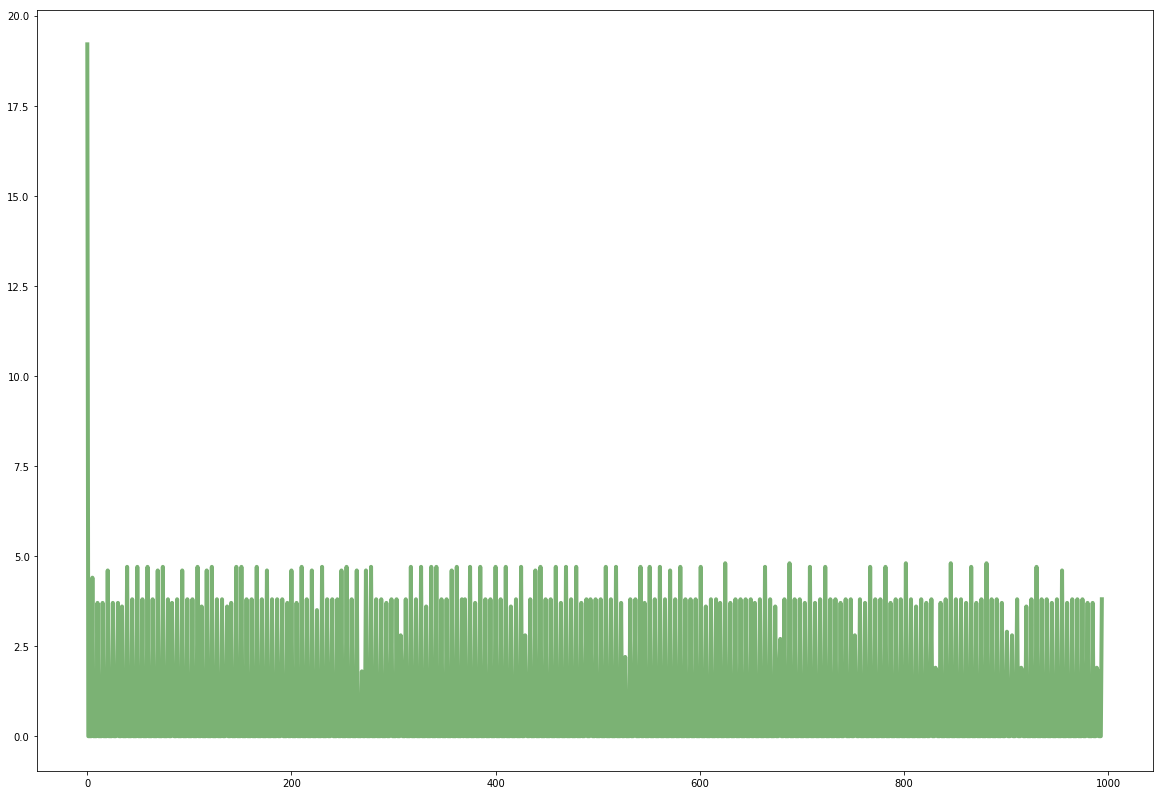

In [28]:
debugCPU1, debugMEM1 = readFile(results)

main = np.array(debugCPU1['1195'])

fig = plt.figure(figsize = (20, 14))
ax = fig.add_subplot(111, label = "Comparison")

ax.plot(main, color = C[0], label = 'Mean', linewidth = 4)
plt.show()

# Optimizing?

In [29]:
path = '../Input/misc/dockerOpt.txt'
results = '../Results/misc/opt.txt'

parseTop(path, results, avoid)

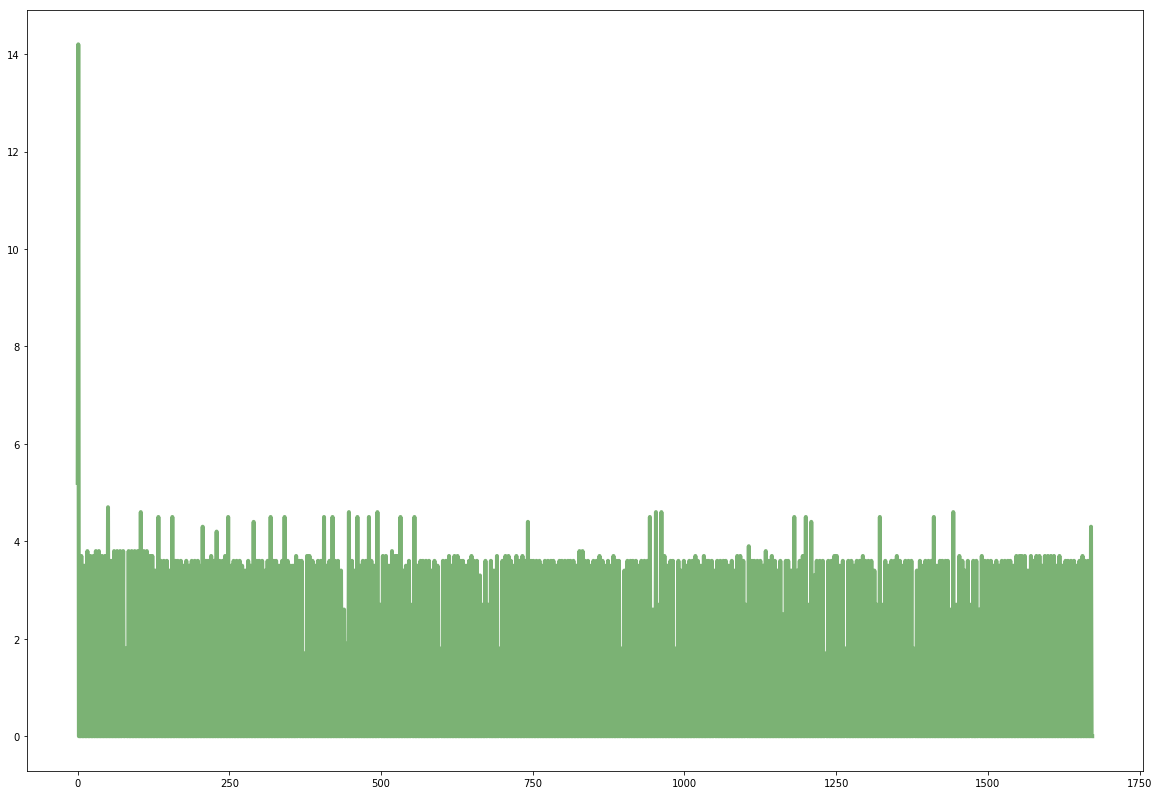

In [30]:
oCPU1, oMEM1 = readFile(results)

main = np.array(oCPU1['2693'])

fig = plt.figure(figsize = (20, 14))
ax = fig.add_subplot(111, label = "Comparison")

ax.plot(main, color = C[0], label = 'Mean', linewidth = 4)
plt.show()